# Cross Validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
from sklearn import datasets
from sklearn import svm
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from erudition.learning.helpers.plots.plotly_render import render, scatter

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [51]:
scores_mean = []
scores_std = []

Cs = np.logspace(-10, 0,10)

digits = datasets.load_digits()

X = digits.data
y = digits.target

for c in Cs:
    clf1 = svm.SVC(kernel='linear', C=c)
    scores  = cross_val_score(clf1, X, y, cv = 5)
    scores_mean.append(np.mean(scores))
    scores_std.append(np.std(scores))


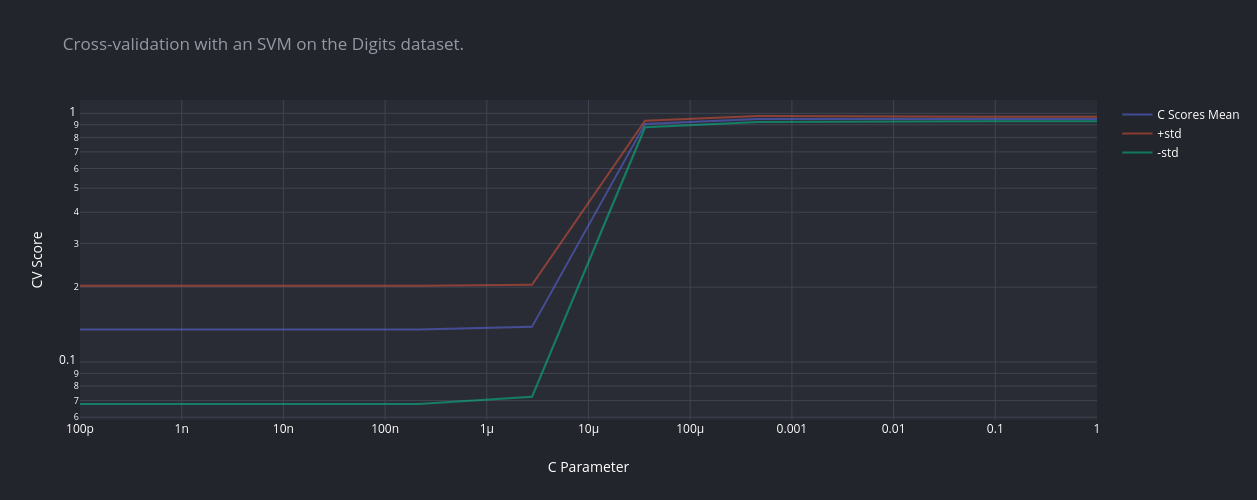

In [52]:
plot_mean = scatter(Cs, scores_mean, 'C Scores Mean', mode='lines')
plot_plus_std = scatter(Cs, np.array(scores_mean)+np.array(scores_std), '+std', mode='lines')
plot_minus_std = scatter(Cs, np.array(scores_mean)-np.array(scores_std), '-std', mode='lines')
fig = go.Figure(data=[plot_mean, plot_plus_std, plot_minus_std])
fig.update_layout(xaxis_type="log", yaxis_type="log")
render(fig, 'Cross-validation with an SVM on the Digits dataset.', width=900, height=500, x_axis_title='C Parameter', y_axis_title='CV Score')

# Recursive Feature Elimination with Cross Validation

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

Class: REFVC

Optimal number of features : 3


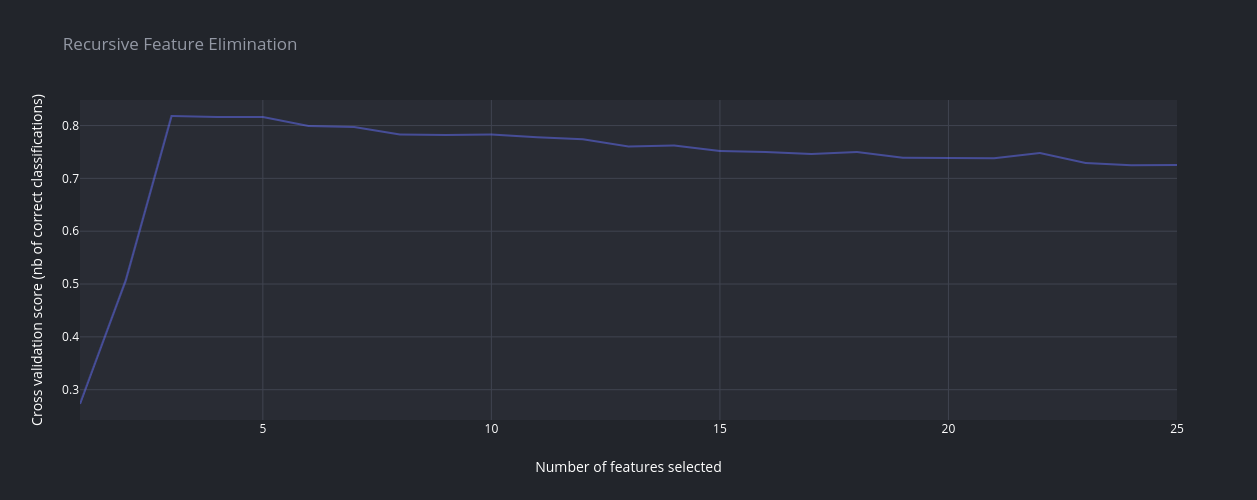

In [48]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification, load_boston

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
%matplotlib inline

p = scatter(np.arange(0, len(rfecv.grid_scores_))+1, rfecv.grid_scores_, '', mode='lines')
fig = go.Figure([p])
render(fig, 
       'Recursive Feature Elimination', 
       x_axis_title='Number of features selected', 
       y_axis_title='Cross validation score (nb of correct classifications)', 
       showlegend=False,
       width=1000,
       height=500
      )
